In [1]:
from compute import Var, Par, Model, adda, addf, addsolver
from compute import RefNode, SolverNode, geteqs
from automations import auto_incidence_tree
import numpy as np
from scipy.sparse import coo_matrix

In [2]:
model = Model()
m = RefNode(name='/', ref=model)

In [3]:
x1,x2,x3 = Var('x_1'), Var('x_2'), Var('x_3')

In [4]:
addf(m, x1+x2, name='f_1')
addf(m, x3/x2, name='f_2')

<f_2>

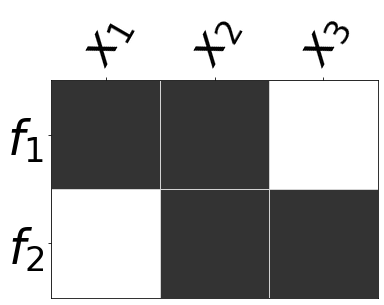

In [5]:
auto_incidence_tree(m, savefig='figures/incidence_demo.png', permutation=[x1,x2,x3],
                    display_subsolves=False, fontsize=48, showtree=False)

Next example

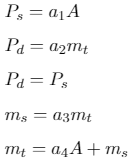

In [6]:
a1,a2,a3,a4,a5,a6= Par('a_1'), Par('a_2'), Par('a_3'), Par('a_4'), Par('a_5'), Par('a_6')
A, mt = Var('A'), Var('m_t')

In [7]:
model = Model()
m = RefNode(name='/', ref=model)
Ps = adda(m, 'P_s', a1*A)
Pd = adda(m, 'P_d', a2*mt)
addf(m, Ps-Pd, name='f_3')
ms = adda(m, 'm_s', a3*mt)
adda(m, mt, a4*A+ms)

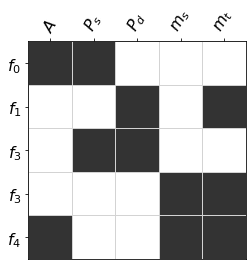

In [8]:
auto_incidence_tree(m, savefig='figures/incidence_demo2.png', permutation=[A,Ps,Pd,ms,mt], 
                    display_subsolves=False, fontsize=24, diagonalgray=False, showtree=False)

In [6]:
A = np.round(np.random.rand(4,5))

In [8]:
import matplotlib.pyplot as plt

In [34]:
def plot_incidence_matrix(A, column_labels, row_labels, pad=None):
    fig, ax = plt.subplots()
    ax.pcolormesh(A, cmap='Greys', edgecolors='lightgray', linewidth=1, vmin=0, vmax=1.2)
    fontsize = 16
    xtickidx, xtags = zip(*enumerate(column_labels))
    kwargs = {'ha': 'left'} if pad else dict()
    plt.xticks(np.array(xtickidx)+0.5, xtags, rotation = 60, fontsize=fontsize, **kwargs)
    ax.xaxis.tick_top()
    ytickidx, ytags = zip(*enumerate(row_labels))
    plt.yticks(np.array(ytickidx)+0.5, ytags, fontsize=fontsize);
    ax.invert_yaxis()
    ax.set_aspect('equal')
    if pad:
        yax = ax.get_yaxis()
        yax.set_tick_params(pad=pad)

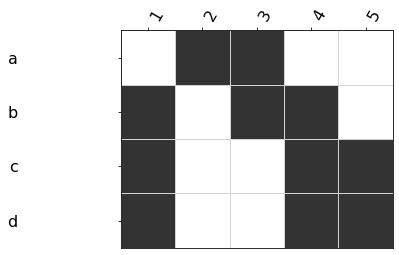

In [35]:
row_labels = ['a','b','c','d']
column_labels = ['1','2','3','4','5']
plot_incidence_matrix(A, column_labels, row_labels, pad=100)